In [15]:
import pandas as pd
import random as rnd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression

In [16]:
train_df = pd.read_csv('../datasets/titanic/train.csv')
test_df = pd.read_csv('../datasets/titanic/test.csv')
combine = [train_df, test_df]

In [17]:
display(train_df)
display(train_df.info())

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

In [18]:
train_df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

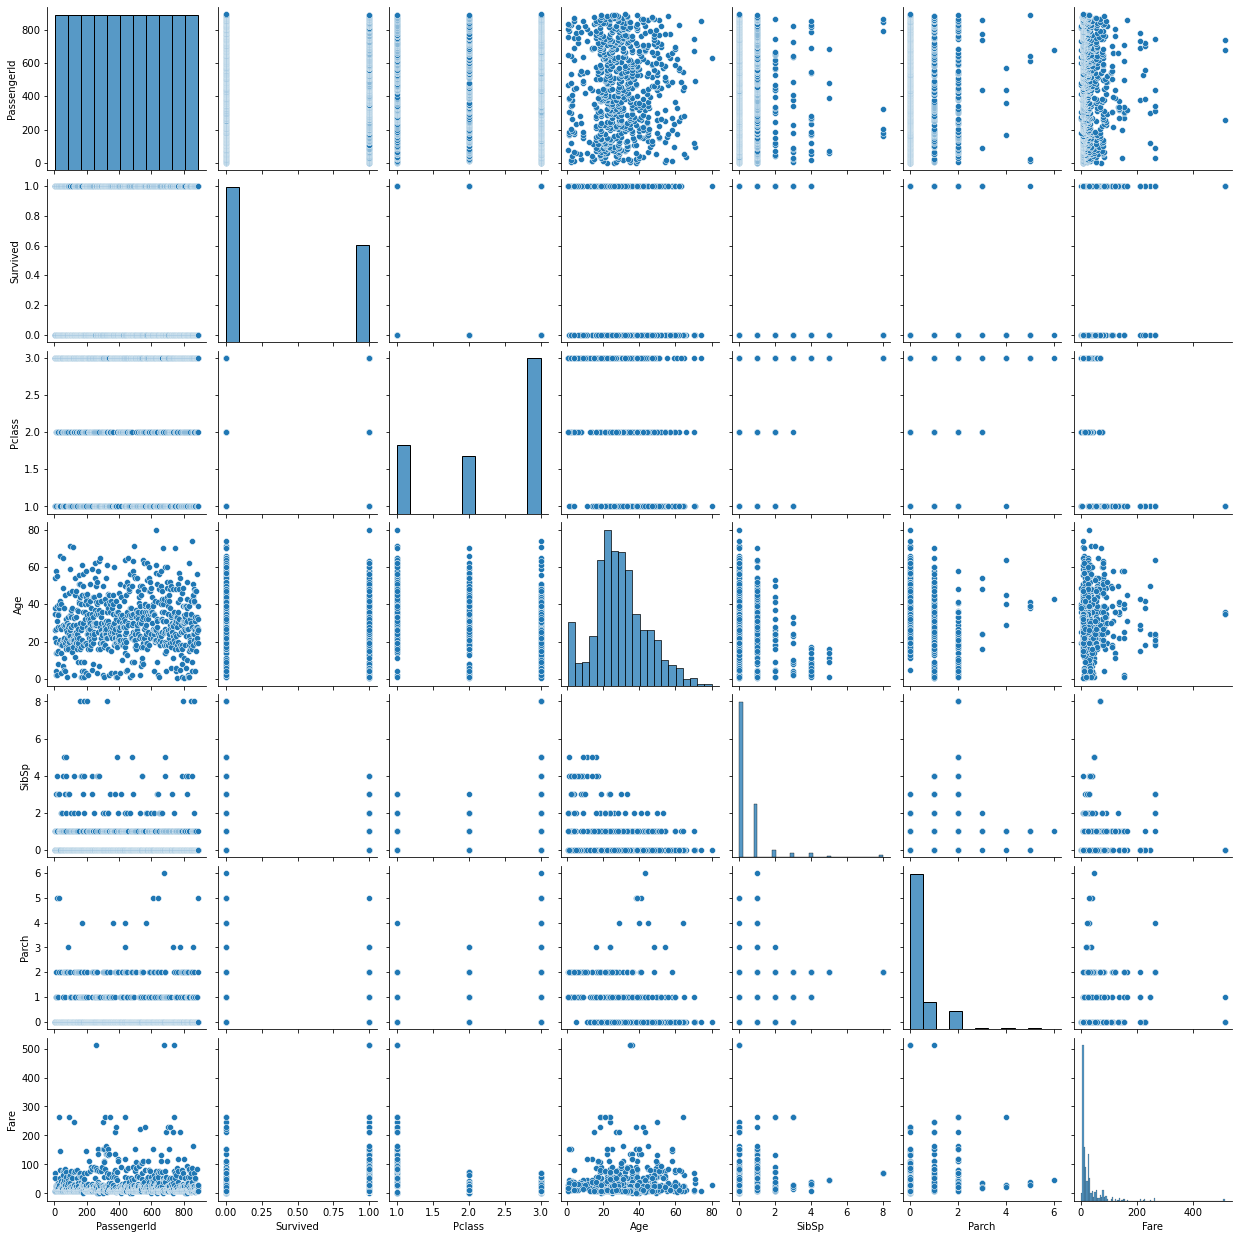

In [19]:
sns.pairplot(train_df)

<AxesSubplot:>

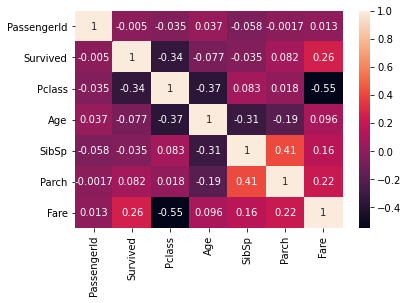

In [20]:
sns.heatmap(train_df.corr(),annot=True)

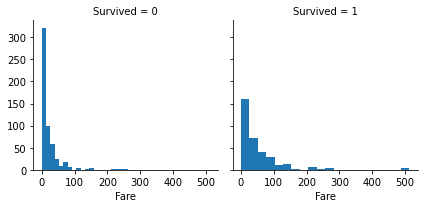

In [21]:
#deducing from the heatmap above, there is a correlation between surviving and fare: 0.26
#not many people paid for the higher-end tickets, which can explain why we have many surviving people in the lower-end
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Fare', bins=20)


Survived
Sex             
female  0.742038
male    0.188908

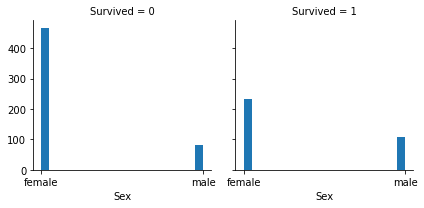

In [22]:
#female tends to have a better chance to survive
display(train_df[['Survived', 'Sex']].groupby('Sex').mean())
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Sex', bins=20)


Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363

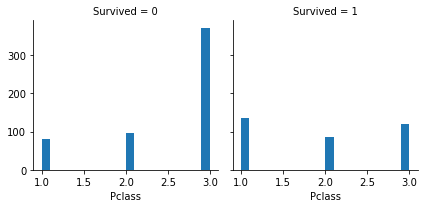

In [23]:
#also there's a negative correlation between surviving and passenger class
display(train_df[['Survived', 'Pclass']].groupby(['Pclass']).mean())
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Pclass', bins=20)

In [24]:
#droping ticket and cabin as they are no good 
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

In [25]:
#extracting title in people name, to see if it effects survival rate
#turned out a lot of miss survived
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(train_df['Title'], train_df['Survived'])

Survived    0    1
Title             
Capt        1    0
Col         1    1
Countess    0    1
Don         1    0
Dr          4    3
Jonkheer    1    0
Lady        0    1
Major       1    1
Master     17   23
Miss       55  127
Mlle        0    2
Mme         0    1
Mr        436   81
Mrs        26   99
Ms          0    1
Rev         6    0
Sir         0    1

In [26]:
#renaming uncommon male titles to Rare
#Mlle, Ms to Miss
#Mme to Mrs
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Don'],'Rare')
    dataset['Title'] = dataset['Title'].replace(['Mlle', 'Ms'],'Miss')
    dataset['Title'] = dataset['Title'].replace(['Mme', ],'Mrs')

In [27]:
train_df[["Title", "Survived"]].groupby("Title").mean()

Survived
Title           
Master  0.575000
Miss    0.702703
Mr      0.156673
Mrs     0.793651
Rare    0.347826

In [28]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5})
    dataset['Title'] = dataset['Title'].fillna(0)

train_df = train_df.drop(['PassengerId', 'Name'], axis=1)
test_df = test_df.drop(['PassengerId', 'Name'], axis=1)
combine=[train_df, test_df]



In [30]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({"male":1, "female":0}).astype(int)